In [2]:
## loading data

import iris

data_path = '../data/*.nc'
cubes = iris.load(data_path)

cube = iris.cube.CubeList(cubes).concatenate()[0]
cube

/Users/alex/anaconda3/lib/python3.5/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


<iris 'Cube' of air_temperature / (degC) (time: 20454; projection_y_coordinate: 290; projection_x_coordinate: 180)>

In [3]:
## plotting image + store bytes
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import io

iplt.contour(next(cube.slices_over('time')))
img_data = io.BytesIO()
plt.savefig(img_data, format='png')
img_data.seek(0)

0

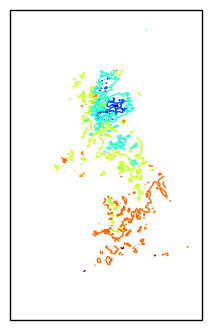

In [4]:
iplt.show()

In [5]:
# GET /image

import boto3
import uuid

bucket_name = 'microsoft-hack'

s3 = boto3.resource('s3')

bucket = s3.Bucket(bucket_name)

uid = str(uuid.uuid4())

bucket.put_object(
    Body=img_data,
    ContentType='image/png',
    Key='{}.png'.format(uid),
    ACL='public-read')

print('https://s3-eu-west-1.amazonaws.com/{}/{}.png'.format(bucket_name, uid))





https://s3-eu-west-1.amazonaws.com/microsoft-hack/13517f85-e029-4e7b-a270-58a2f51f2433.png
